In [59]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [60]:
image_path = r'/Users/ayantanwar/Documents/CE712/CE-712-Assignments/lake.jpg'
img = Image.open(image_path)
img_array = np.array(img)

In [61]:
mode = img.mode
bit_depth = img_array.dtype.itemsize * 8   # converting bytes to bits
print(bit_depth)

if len(img_array.shape) == 2:
    num_bands=1  #grayscale
else :
    num_bands = img_array.shape[2]
print("Spectral Resolution : ",num_bands," band(s)")

8
Spectral Resolution :  3  band(s)


In [62]:
downscaled = img.resize((img.width//10, img.height // 10), Image.BILINEAR)

upscaled = downscaled.resize((img.width * 10, img.height * 10), Image.BILINEAR)

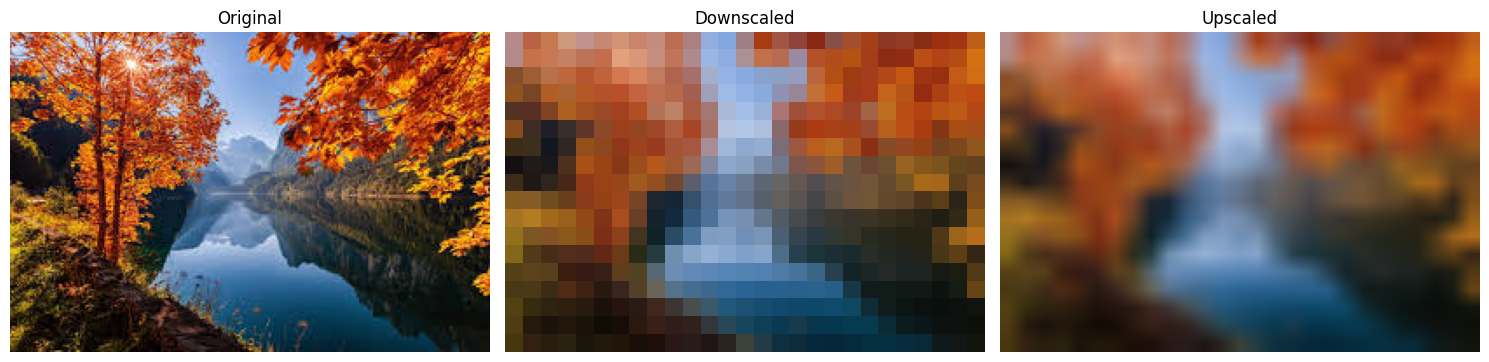

In [63]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(downscaled,cmap='gray')
axes[1].set_title('Downscaled')
axes[1].axis('off')

axes[2].imshow(upscaled,cmap='gray')
axes[2].set_title('Upscaled')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [64]:
print("Original size : ",img.size)
print("Downscaled size : ",downscaled.size)
print("Upscaled size : ",upscaled.size)

Original size :  (275, 183)
Downscaled size :  (27, 18)
Upscaled size :  (2750, 1830)


In [1]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.enums import Resampling

In [ ]:
image_path = r'/Users/ayantanwar/Documents/CE712/CE-712-Assignments/clipped1.tif'

In [3]:
with rasterio.open(image_path) as src :
    original = src.read(1)

print("--- Original Image Properties ---")
print(f"Spatial Resolution : {src.res[0]} m x {src.res[1]} m per pixel" )
print(f"Radiometric : dtype = {src.dtypes[0]}")
print(f"Dimensions : {src.height} rows x {src.width} columns")
print(f"Number of Bands : {src.count}")

--- Original Image Properties ---
Spatial Resolution : 30.0 m x 30.0 m per pixel
Radiometric : dtype = uint16
Dimensions : 7821 rows x 7681 columns
Number of Bands : 1


In [5]:
with rasterio.open(image_path) as src :
    original = src.read(1)
    downscaled = src.read(
        out_shape=(1,src.height//20,src.width//20),
        resampling=Resampling.bilinear
    )[0]

    upscaled = src.read(
        out_shape=(1,src.height*20,src.width*20),
        resampling=Resampling.bilinear
    )[0]

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

axes[0].imshow(original,cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(downscaled,cmap='gray')
axes[1].set_title('Downscaled')
axes[1].axis('off')

axes[2].imshow(upscaled,cmap='gray')
axes[2].set_title('Upscaled')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print("Original size : ",original.shape)
print("Downscaled size : ",downscaled.shape)
print("Upscaled size : ",upscaled.shape)

Original size :  (134, 249)
Downscaled size :  (6, 12)
Upscaled size :  (2680, 4980)
